# Hypothesis Testing

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Sample data

np.random.seed(42)
data1 = np.random.normal(loc=50, scale=10, size=100)  # Sample 1
data2 = np.random.normal(loc=52, scale=10, size=100)  # Sample 2

## Hypothesis Testing Basics

- Null Hypothesis (H0): μ1 = μ2
- Alternate Hypothesis (H1): μ1 ≠ μ2

## p-value Concept

- p-value = Probability of observing data at least as extreme as current, under H0

In [3]:
t_stat, p_val = stats.ttest_ind(data1, data2)
print("t-statistic:", t_stat)
print("p-value:", p_val)

alpha = 0.05  # Significance level
if p_val < alpha:
    print("Reject Null Hypothesis (H0)")
else:
    print("Fail to Reject Null Hypothesis (H0)")

t-statistic: -2.47663754365921
p-value: 0.014101049720544712
Reject Null Hypothesis (H0)


## Z-test (Large Sample / Known Variance)

In [5]:
mean_pop = 50
sigma_pop = 10
sample_mean = np.mean(data1)
n = len(data1)

z_stat = (sample_mean - mean_pop) / (sigma_pop / np.sqrt(n))
p_val_z = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Two-tailed test

print("Z-test statistic:", z_stat)
print()
print("Z-test p-value:", p_val_z)

Z-test statistic: -1.0384651739409279

Z-test p-value: 0.299053540786012


## One-sample t-test

In [7]:
# H0: mean(data1) = 50
t_stat_one, p_val_one = stats.ttest_1samp(data1, popmean=50)
print("One-sample t-test statistic:", t_stat_one)
print()
print("One-sample t-test p-value:", p_val_one)

One-sample t-test statistic: -1.1434720057588346

One-sample t-test p-value: 0.2556001762530408


## Visualization: Sampling Distribution & Critical Region

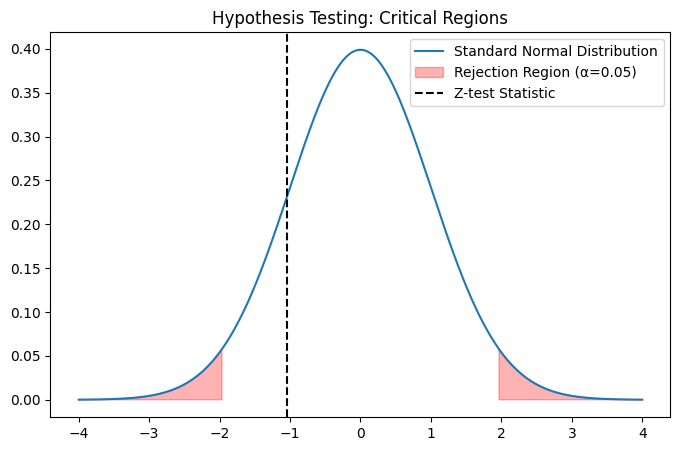

In [8]:
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Standard Normal Distribution")
plt.fill_between(x, y, where=(x < stats.norm.ppf(alpha/2)) | (x > stats.norm.ppf(1-alpha/2)),
                 color="red", alpha=0.3, label="Rejection Region (α=0.05)")
plt.axvline(z_stat, color="black", linestyle="--", label="Z-test Statistic")
plt.title("Hypothesis Testing: Critical Regions")
plt.legend()
plt.show()